In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [26]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [27]:
train_df = pd.read_csv(r"C:\Users\sakth\Downloads\MNIST\sign_mnist_test\sign_mnist_test.csv")
test_df = pd.read_csv(r"C:\Users\sakth\Downloads\MNIST\sign_mnist_train\sign_mnist_train.csv")

In [28]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [29]:
fig = px.histogram(train_df, x='label',color='label', title='Distribution of Labels in Training Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

In [30]:
fig = px.histogram(test_df, x='label',color='label', title='Distribution of Labels in Testing Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

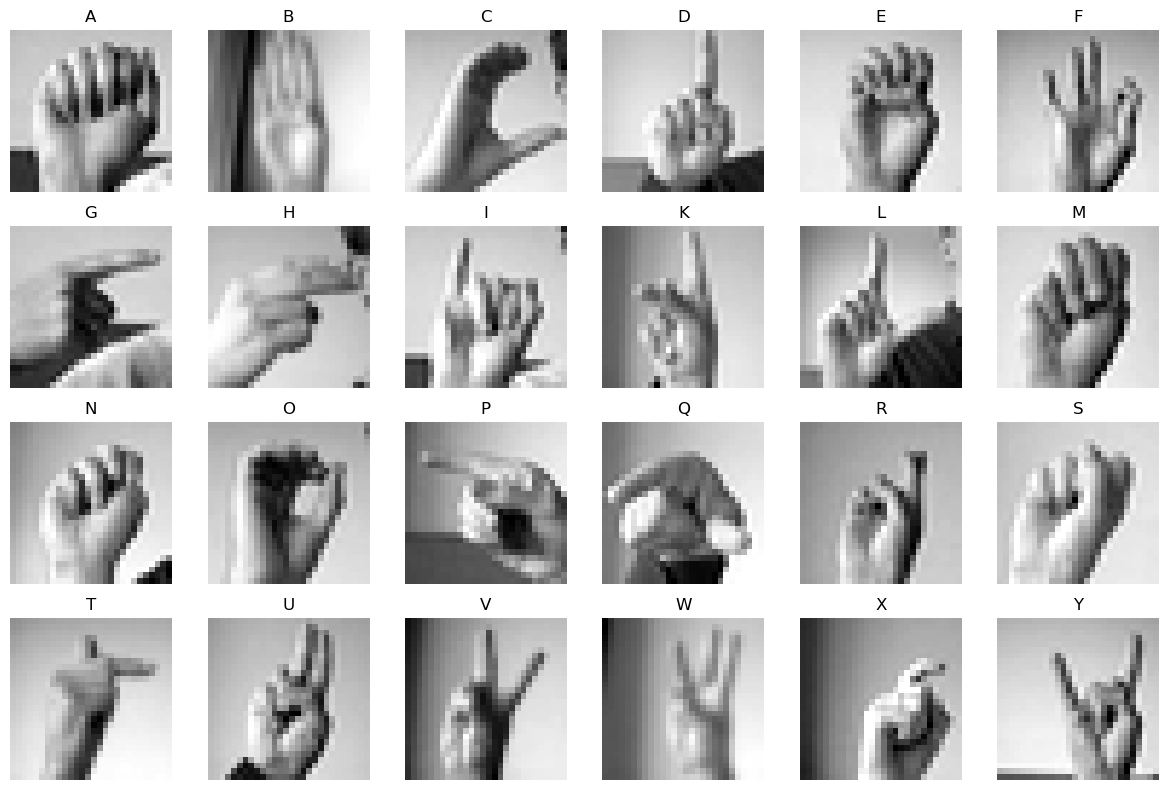

In [31]:
# Group the dataframe by the 'label' column
label_groups = train_df.groupby('label')

# Iterate over each label group and display one image
fig, axs = plt.subplots(4, 6, figsize=(12, 8))

for i, (label, group) in enumerate(label_groups):
    # Get the first image from the group
    image = group.iloc[0, 1:].values.reshape(28, 28)
    
    # Calculate the subplot index
    row = i // 6
    col = i % 6
    
    # Convert label to integer and add 65 to get ASCII value
    ascii_value = int(label) + 65
    
    # Display the image
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(chr(ascii_value))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [32]:
X_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df["label"]

In [33]:
X_test = test_df.drop(labels = ["label"],axis = 1)
y_test = test_df["label"]

In [34]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [35]:
# Reshape the data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [37]:
# Convert the labels to one-hot encoded format
num_classes = 25
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7172, 28, 28, 1)
(7172, 25)
(27455, 28, 28, 1)
(27455, 25)


In [39]:
from tensorflow.keras.optimizers import RMSprop

# Create the CNN model
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       409728    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [41]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

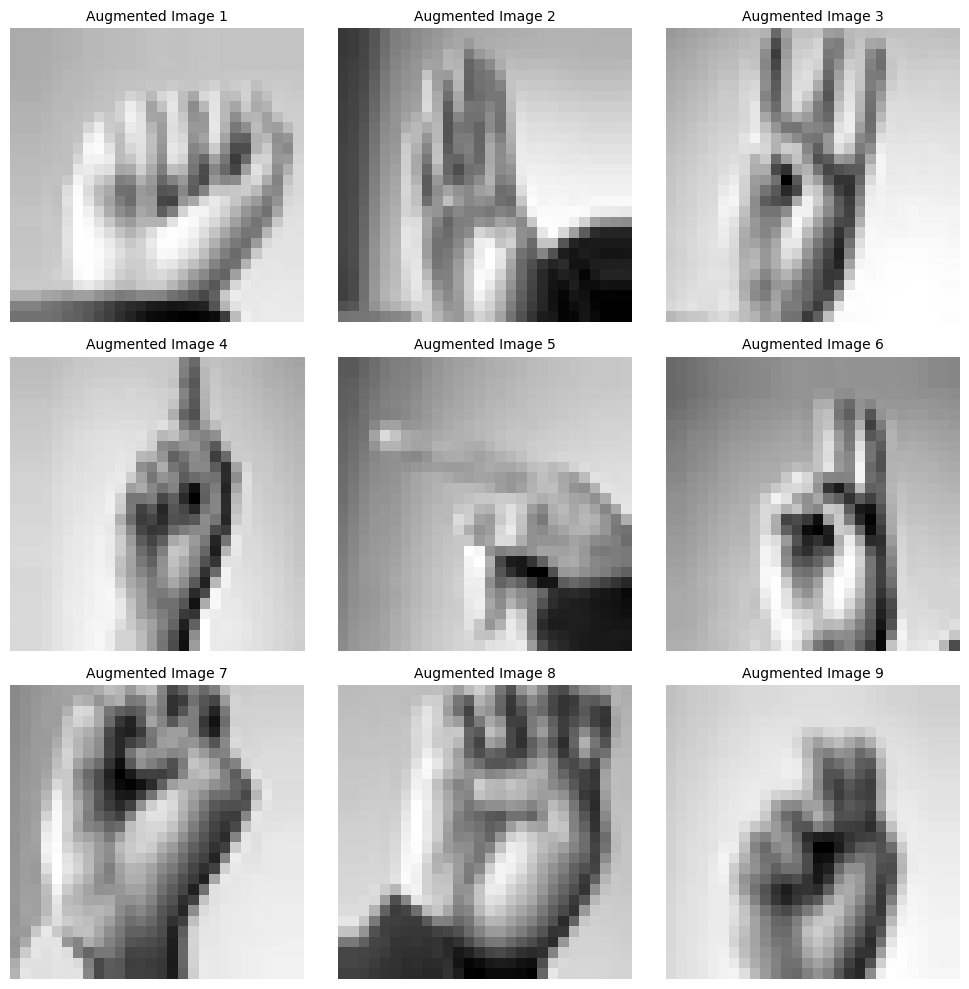

In [42]:
# Generate augmented images
augmented_images = []
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for img in X_batch:
        augmented_images.append(img)
    break  

# Display augmented images
plt.figure(figsize=(10, 10))
for i, image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f'Augmented Image {i + 1}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
#Training the model
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3,factor=0.5, min_lr=0.0001)

history = model.fit_generator(datagen.flow(X_train,y_train), epochs = 25, validation_data = (X_test,y_test), verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/25
225/225 [==============================] - ETA: 0s - loss: 2.6093 - accuracy: 0.2368WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 76s 337ms/step - loss: 2.6093 - accuracy: 0.2368 - val_loss: 1.4207 - val_accuracy: 0.5545 - lr: 0.0010
Epoch 2/25
225/225 [==============================] - ETA: 0s - loss: 0.8908 - accuracy: 0.7174WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 332ms/step - loss: 0.8908 - accuracy: 0.7174 - val_loss: 1.0278 - val_accuracy: 0.7153 - lr: 0.0010
Epoch 3/25
225/225 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8713WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 330ms/step - loss: 0.3907 - accuracy: 0.8713 - val_loss: 0.8284 - val_accuracy: 0.8184 - lr: 0.0010
Epoch 4/25
225/225 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9258WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 330ms/step - loss: 0.2265 - accuracy: 0.9258 - val_loss: 1.2389 - val_accuracy: 0.7131 - lr: 0.0010
Epoch 5/25
225/225 [==============================] - ETA: 0s - loss: 0.1547 - accuracy: 0.9506WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 329ms/step - loss: 0.1547 - accuracy: 0.9506 - val_loss: 0.9198 - val_accuracy: 0.8524 - lr: 0.0010
Epoch 6/25
225/225 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9631WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 332ms/step - loss: 0.1159 - accuracy: 0.9631 - val_loss: 0.8574 - val_accuracy: 0.8699 - lr: 0.0010
Epoch 7/25
225/225 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9664WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 328ms/step - loss: 0.0975 - accuracy: 0.9664 - val_loss: 0.8914 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 8/25
225/225 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9755WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 329ms/step - loss: 0.0761 - accuracy: 0.9755 - val_loss: 0.7767 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 9/25
225/225 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9766WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 76s 339ms/step - loss: 0.0704 - accuracy: 0.9766 - val_loss: 1.1605 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 10/25
225/225 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9785WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 328ms/step - loss: 0.0677 - accuracy: 0.9785 - val_loss: 1.0993 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 11/25
224/225 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9844WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 73s 327ms/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 1.0655 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 12/25
225/225 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9812WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 332ms/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 1.1978 - val_accuracy: 0.8632 - lr: 0.0010
Epoch 13/25
225/225 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9845WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 1.0571 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 14/25
225/225 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9854WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 332ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.9924 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 15/25
225/225 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9893WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 334ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 1.1594 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 16/25
225/225 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9868WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0459 - accuracy: 0.9868 - val_loss: 1.4473 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 17/25
225/225 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9881WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 332ms/step - loss: 0.0448 - accuracy: 0.9881 - val_loss: 1.0619 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 18/25
225/225 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9895WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0371 - accuracy: 0.9895 - val_loss: 1.2288 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 19/25
225/225 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9919WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 86s 383ms/step - loss: 0.0328 - accuracy: 0.9919 - val_loss: 1.0696 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 20/25
225/225 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9900WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 1.0512 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 21/25
225/225 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9909WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 75s 332ms/step - loss: 0.0333 - accuracy: 0.9909 - val_loss: 1.2027 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 22/25
225/225 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9919WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0354 - accuracy: 0.9919 - val_loss: 1.2172 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 23/25
225/225 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9916WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0353 - accuracy: 0.9916 - val_loss: 1.0540 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 24/25
225/225 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9918WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 330ms/step - loss: 0.0353 - accuracy: 0.9918 - val_loss: 1.1675 - val_accuracy: 0.8942 - lr: 0.0010
Epoch 25/25
225/225 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9875WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


225/225 [==============================] - 74s 331ms/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 1.4796 - val_accuracy: 0.8837 - lr: 0.0010


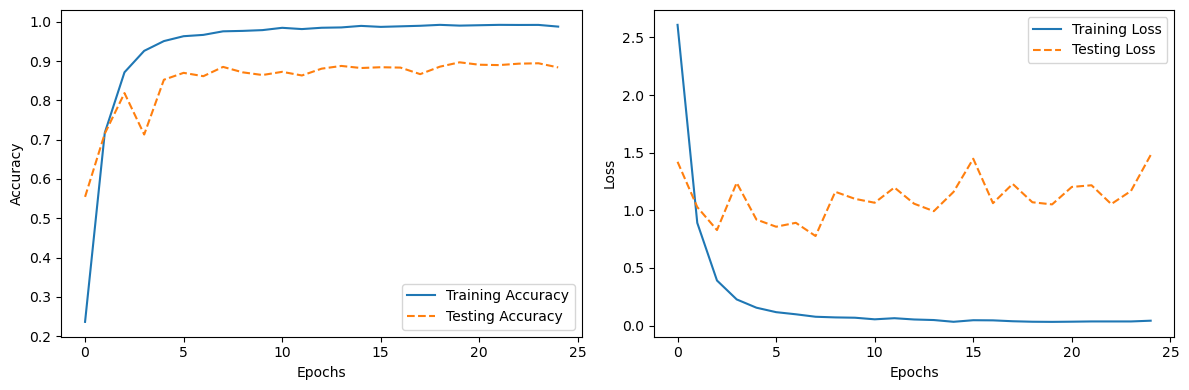

In [44]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [45]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

858/858 [==============================] - 41s 47ms/step


In [46]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

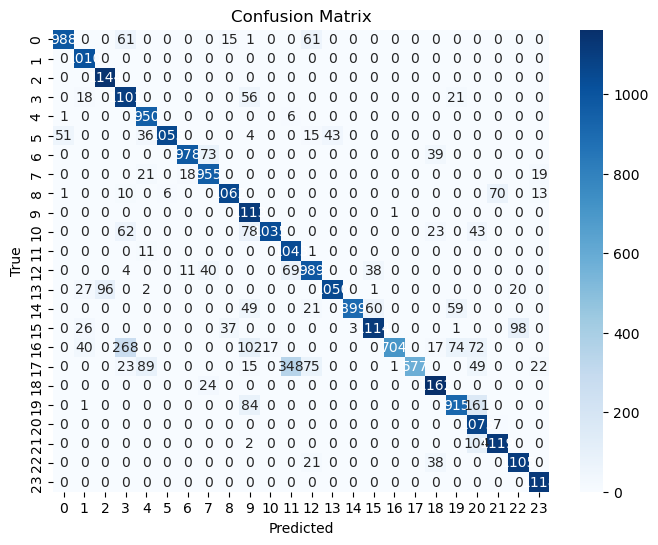

In [47]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

858/858 [==============================] - 41s 47ms/step - loss: 1.4796 - accuracy: 0.8837
validation test results - Loss: 1.479616641998291 - Accuracy: 88.36641907691956%


In [49]:
model.save("americanSignLanguage.h5")

1/1 [==============================] - 0s 40ms/step


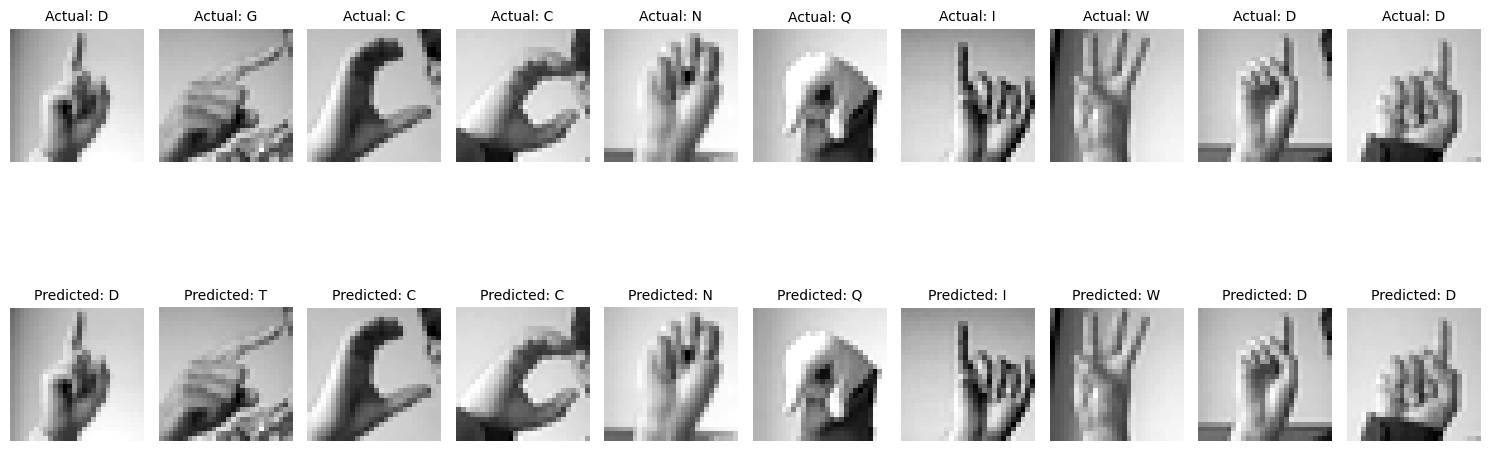

In [50]:
# Get model predictions for the first 10 images in the test set
predictions_asl = model.predict(X_test[:10])
predicted_labels_asl = np.argmax(predictions_asl, axis=1)
actual_labels_asl = np.argmax(y_test[:10], axis=1)

# Decode labels using ASCII values
predicted_labels_asl = [chr(label + 65) for label in predicted_labels_asl]
actual_labels_asl = [chr(label + 65) for label in actual_labels_asl]

# Display actual vs predicted images for the first 10 images
plt.figure(figsize=(15, 7))
for i in range(10):
    # Display actual image
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_labels_asl[i]}", fontsize=10)
    plt.axis('off')
    
    # Display predicted image
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels_asl[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()